#### !python.exe -m pip install --upgrade pip

In [3]:
!pip install opencv-python
!pip install tensorflow

In [4]:
!pip install --user tensorflow==2.9

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\Testing\glioma_tumor\image(1).jpg
./input\Testing\glioma_tumor\image(10).jpg
./input\Testing\glioma_tumor\image(100).jpg
./input\Testing\glioma_tumor\image(11).jpg
./input\Testing\glioma_tumor\image(12).jpg
./input\Testing\glioma_tumor\image(13).jpg
./input\Testing\glioma_tumor\image(14).jpg
./input\Testing\glioma_tumor\image(15).jpg
./input\Testing\glioma_tumor\image(16).jpg
./input\Testing\glioma_tumor\image(17).jpg
./input\Testing\glioma_tumor\image(18).jpg
./input\Testing\glioma_tumor\image(19).jpg
./input\Testing\glioma_tumor\image(2).jpg
./input\Testing\glioma_tumor\image(20).jpg
./input\Testing\glioma_tumor\image(21).jpg
./input\Testing\glioma_tumor\image(22).jpg
./input\Testing\glioma_tumor\image(23).jpg
./input\Testing\glioma_tumor\image(24).jpg
./input\Testing\glioma_tumor\image(25).jpg
./input\Testing\glioma_tumor\image(26).jpg
./input\Testing\glioma_tumor\image(27).jpg
./input\Testing\glioma_tumor\image(28).jpg
./input\Testing\glioma_tumor\image(29).jpg
./input\Test

./input\Testing\pituitary_tumor\image(1).jpg
./input\Testing\pituitary_tumor\image(10).jpg
./input\Testing\pituitary_tumor\image(11).jpg
./input\Testing\pituitary_tumor\image(13).jpg
./input\Testing\pituitary_tumor\image(15).jpg
./input\Testing\pituitary_tumor\image(18).jpg
./input\Testing\pituitary_tumor\image(19).jpg
./input\Testing\pituitary_tumor\image(2).jpg
./input\Testing\pituitary_tumor\image(20).jpg
./input\Testing\pituitary_tumor\image(21).jpg
./input\Testing\pituitary_tumor\image(22).jpg
./input\Testing\pituitary_tumor\image(23).jpg
./input\Testing\pituitary_tumor\image(27).jpg
./input\Testing\pituitary_tumor\image(28).jpg
./input\Testing\pituitary_tumor\image(3).jpg
./input\Testing\pituitary_tumor\image(30).jpg
./input\Testing\pituitary_tumor\image(31).jpg
./input\Testing\pituitary_tumor\image(34).jpg
./input\Testing\pituitary_tumor\image(35).jpg
./input\Testing\pituitary_tumor\image(36).jpg
./input\Testing\pituitary_tumor\image(37).jpg
./input\Testing\pituitary_tumor\image

./input\Training\meningioma_tumor\m (51).jpg
./input\Training\meningioma_tumor\m (52).jpg
./input\Training\meningioma_tumor\m (53).jpg
./input\Training\meningioma_tumor\m (54).jpg
./input\Training\meningioma_tumor\m (55).jpg
./input\Training\meningioma_tumor\m (56).jpg
./input\Training\meningioma_tumor\m (57).jpg
./input\Training\meningioma_tumor\m (58).jpg
./input\Training\meningioma_tumor\m (59).jpg
./input\Training\meningioma_tumor\m (6).jpg
./input\Training\meningioma_tumor\m (60).jpg
./input\Training\meningioma_tumor\m (61).jpg
./input\Training\meningioma_tumor\m (62).jpg
./input\Training\meningioma_tumor\m (63).jpg
./input\Training\meningioma_tumor\m (64).jpg
./input\Training\meningioma_tumor\m (65).jpg
./input\Training\meningioma_tumor\m (66).jpg
./input\Training\meningioma_tumor\m (67).jpg
./input\Training\meningioma_tumor\m (68).jpg
./input\Training\meningioma_tumor\m (69).jpg
./input\Training\meningioma_tumor\m (7).jpg
./input\Training\meningioma_tumor\m (70).jpg
./input\Trai

./input\Training\no_tumor\image(246).jpg
./input\Training\no_tumor\image(247).jpg
./input\Training\no_tumor\image(248).jpg
./input\Training\no_tumor\image(249).jpg
./input\Training\no_tumor\image(25).jpg
./input\Training\no_tumor\image(250).jpg
./input\Training\no_tumor\image(251).jpg
./input\Training\no_tumor\image(252).jpg
./input\Training\no_tumor\image(253).jpg
./input\Training\no_tumor\image(254).jpg
./input\Training\no_tumor\image(255).jpg
./input\Training\no_tumor\image(256).jpg
./input\Training\no_tumor\image(257).jpg
./input\Training\no_tumor\image(258).jpg
./input\Training\no_tumor\image(259).jpg
./input\Training\no_tumor\image(26).jpg
./input\Training\no_tumor\image(260).jpg
./input\Training\no_tumor\image(261).jpg
./input\Training\no_tumor\image(262).jpg
./input\Training\no_tumor\image(263).jpg
./input\Training\no_tumor\image(264).jpg
./input\Training\no_tumor\image(265).jpg
./input\Training\no_tumor\image(266).jpg
./input\Training\no_tumor\image(267).jpg
./input\Training\n

./input\Training\pituitary_tumor\p (460).jpg
./input\Training\pituitary_tumor\p (461).jpg
./input\Training\pituitary_tumor\p (462).jpg
./input\Training\pituitary_tumor\p (463).jpg
./input\Training\pituitary_tumor\p (464).jpg
./input\Training\pituitary_tumor\p (465).jpg
./input\Training\pituitary_tumor\p (466).jpg
./input\Training\pituitary_tumor\p (467).jpg
./input\Training\pituitary_tumor\p (468).jpg
./input\Training\pituitary_tumor\p (469).jpg
./input\Training\pituitary_tumor\p (47).jpg
./input\Training\pituitary_tumor\p (470).jpg
./input\Training\pituitary_tumor\p (471).jpg
./input\Training\pituitary_tumor\p (472).jpg
./input\Training\pituitary_tumor\p (473).jpg
./input\Training\pituitary_tumor\p (474).jpg
./input\Training\pituitary_tumor\p (475).jpg
./input\Training\pituitary_tumor\p (476).jpg
./input\Training\pituitary_tumor\p (477).jpg
./input\Training\pituitary_tumor\p (478).jpg
./input\Training\pituitary_tumor\p (479).jpg
./input\Training\pituitary_tumor\p (48).jpg
./input\Trai

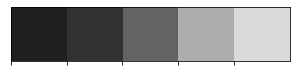

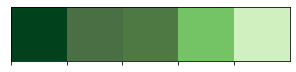

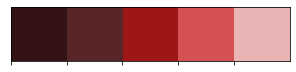

In [4]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

---

In [5]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [69]:
def preprocess(img):
        thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # get external contour
        contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        big_contour = max(contours, key=cv2.contourArea)

        # draw white filled contour on black background as mask
        mask = np.zeros_like(thresh, dtype=np.uint8)
        cv2.drawContours(mask, [big_contour], 0, 255, -1)

        # get bounds of contour
        x,y,w,h = cv2.boundingRect(big_contour)

        # crop image and mask
        img_crop = img[y:y+h, x:x+w]
        mask_crop = mask[y:y+h, x:x+w]
        result = cv2.cvtColor(img_crop, cv2.COLOR_BGR2BGRA)
        result[:,:,3] = mask_crop
        return result
X_train = []
y_train = []
image_size = 255
for i in labels:
    folderPath = os.path.join('./input','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         print(img)
        result=preprocess(img)
#         print(result)
        img = cv2.resize(result,(image_size, image_size))
        X_train.append(np.array(img))
#         print("bffsd",X_train)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./input','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        result=preprocess(img)
        img = cv2.resize(result,(image_size, image_size))
        X_train.append(np.array(img))
#         print(X_train)
        y_train.append(i)
        

        
X_train = np.array(X_train)
X_train = X_train[:,:,:,0:3]
y_train = np.array(y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 33.12it/s]


In [74]:
X_train

array([[[[ 7,  7,  7],
         [ 7,  7,  7],
         [ 7,  7,  7],
         ...,
         [ 6,  6,  6],
         [ 7,  7,  7],
         [ 6,  6,  6]],

        [[ 7,  7,  7],
         [ 7,  7,  7],
         [ 7,  7,  7],
         ...,
         [ 6,  6,  6],
         [ 7,  7,  7],
         [ 6,  6,  6]],

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [ 7,  7,  7],
         [ 7,  7,  7],
         [ 6,  6,  6]],

        ...,

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [ 4,  4,  4],
         [ 3,  3,  3],
         [ 3,  3,  3]],

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4]],

        [[ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2]]],


       [[[ 3,  3,  3],
         [ 3,  3,  3],
         [ 3, 

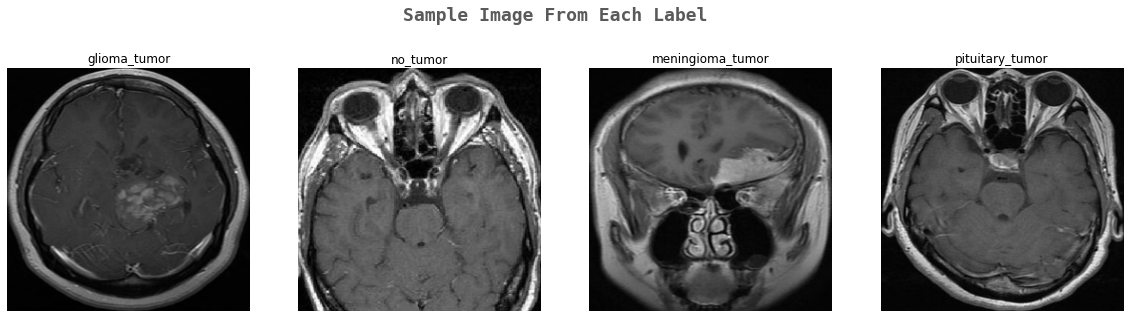

In [71]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [72]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [73]:
X_train.shape

(3264, 255, 255, 3)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [76]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [77]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))


In [78]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [79]:
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 255, 255, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 255, 255, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                            

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 64, 64, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 64, 64, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 64, 64, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 64, 64, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 32, 32, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 32, 32, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 32, 32, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_b

 block4b_dwconv (DepthwiseConv2  (None, 16, 16, 480)  4320       ['block4b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 16, 16, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 16, 16, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePoolin

                                                                                                  
 block5a_activation (Activation  (None, 16, 16, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
          

                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 16, 16, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 16, 16, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 16, 16, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 8, 8, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 8, 8, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6b_add[0][0]']            
          

                                                                                                  
 block6d_add (Add)              (None, 8, 8, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 8, 8, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 8, 8, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation) 

In [80]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])


In [81]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [57]:
X_train

array([[[[  3,   3,   3,   0],
         [  4,   4,   4,   0],
         [  4,   4,   4,   0],
         ...,
         [  3,   3,   3,   0],
         [  3,   3,   3,   0],
         [  3,   3,   3,   0]],

        [[  3,   3,   3,   0],
         [  4,   4,   4,   0],
         [  4,   4,   4,   0],
         ...,
         [  3,   3,   3,   0],
         [  3,   3,   3,   0],
         [  3,   3,   3,   0]],

        [[  3,   3,   3,   0],
         [  4,   4,   4,   0],
         [  4,   4,   4,   0],
         ...,
         [  3,   3,   3,   0],
         [  3,   3,   3,   0],
         [  3,   3,   3,   0]],

        ...,

        [[  2,   2,   2,   0],
         [  2,   2,   2,   0],
         [  2,   2,   2,   0],
         ...,
         [  3,   3,   3,   0],
         [  3,   3,   3,   0],
         [  5,   5,   5,   0]],

        [[  0,   0,   0,   0],
         [  1,   1,   1,   0],
         [  1,   1,   1,   0],
         ...,
         [  2,   2,   2,   0],
         [  2,   2,   2,   0],
         

In [82]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8316 
Epoch 1: val_accuracy improved from -inf to 0.80272, saving model to effnet.h5
83/83 [==============================] - 1306s 15s/step - loss: 0.4427 - accuracy: 0.8316 - val_loss: 0.6636 - val_accuracy: 0.8027 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.1655 - accuracy: 0.9478 
Epoch 2: val_accuracy improved from 0.80272 to 0.91837, saving model to effnet.h5
83/83 [==============================] - 1245s 15s/step - loss: 0.1655 - accuracy: 0.9478 - val_loss: 0.2244 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9519 
Epoch 3: val_accuracy did not improve from 0.91837
83/83 [==============================] - 1015s 12s/step - loss: 0.1484 - accuracy: 0.9519 - val_loss: 0.3685 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 4/12
83/83 [==============================] - ETA: 0s - loss: 

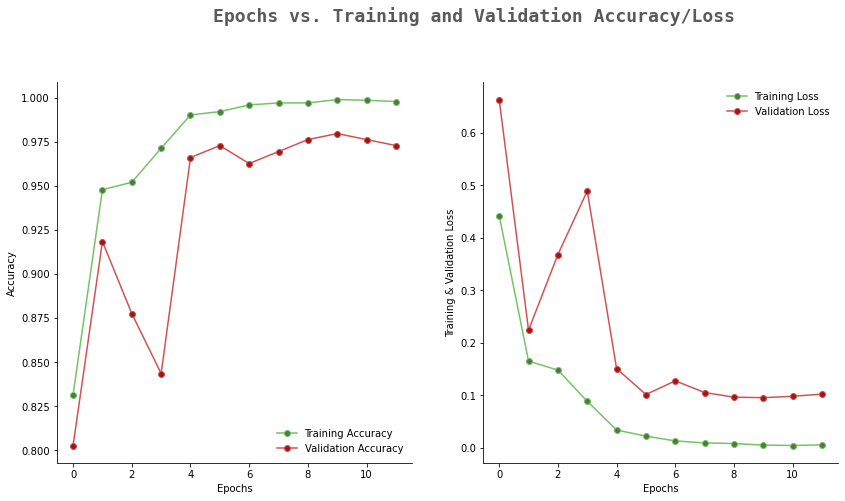

In [83]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [84]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 23s 2s/step


In [91]:
print(classification_report(y_test_new,pred))
# 0 - Glioma Tumor
# 1 - No Tumor
# 2 - Meningioma Tumor
# 3 - Pituitary Tumor

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       1.00      1.00      1.00        51
           2       0.99      0.98      0.98        96
           3       1.00      1.00      1.00        87

    accuracy                           0.99       327
   macro avg       0.99      0.99      0.99       327
weighted avg       0.99      0.99      0.99       327



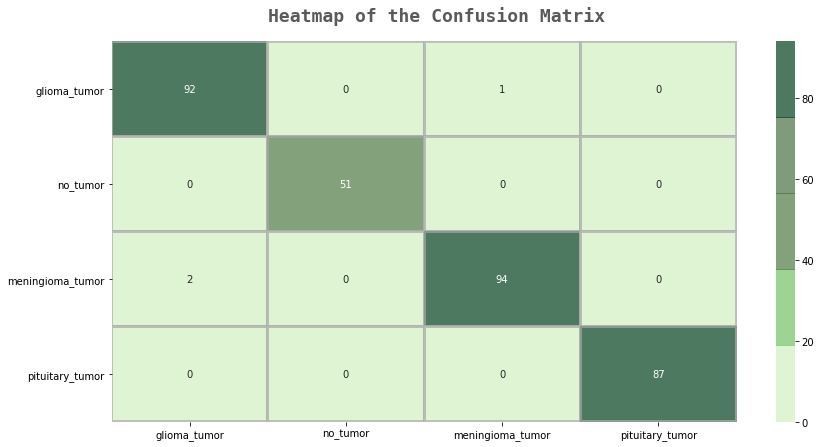

In [92]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()
